In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
import seaborn as sns

# **Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)**

In [53]:
df = pd.read_csv('/content/drive/MyDrive/RandomWalk/dataset.csv')

In [54]:
df.head(25)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [55]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,337.000000,342.000000,342.000000,342.000000
mean,43.876855,17.151170,200.915205,4273.976608
std,5.478600,1.974793,14.061714,1119.229602
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.600000,190.000000,3550.000000
50%,44.100000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,15000.000000


In [56]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,7
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,16


In [58]:
df_copy = df.copy(deep=True)


# **Handling Missing Values**

In [59]:

missing_percentage = df.isnull().mean() * 100

missing_columns = missing_percentage[missing_percentage > 0]
print("Columns with Missing Values:\n", missing_columns)


Columns with Missing Values:
 bill_length_mm       2.034884
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  4.651163
dtype: float64


In [60]:
df_copy.dropna(subset=['sex'], inplace=True)
print(missing_percentage[df_copy.isnull().mean() * 100>0] )

bill_length_mm    2.034884
dtype: float64


In [61]:


# Group data by species and calculate the mean bill length for each group
mean_bill_length_by_species = df_copy.groupby('species')['bill_length_mm'].mean()

# Fill NaN values in bill_length_mm with the mean bill length for the corresponding species
df_copy['bill_length_mm'].fillna(df_copy.groupby('species')['bill_length_mm'].transform('mean'), inplace=True)


In [62]:
print(missing_percentage[df_copy.isnull().mean() * 100>0] )

Series([], dtype: float64)


In [63]:
df_copy.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


#**What is the average body_mass_g for Gentoo penguins**

In [64]:

# Filter the DataFrame for Gentoo penguins
gentoo_penguins = df_copy[df_copy['species'] == 'Gentoo']

# Calculate the average body_mass_g for Gentoo penguins
average_body_mass_gentoo = gentoo_penguins['body_mass_g'].mean()

print("The average body mass for Gentoo penguins is:", average_body_mass_gentoo)


The average body mass for Gentoo penguins is: 5155.172413793103


# **How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species?**

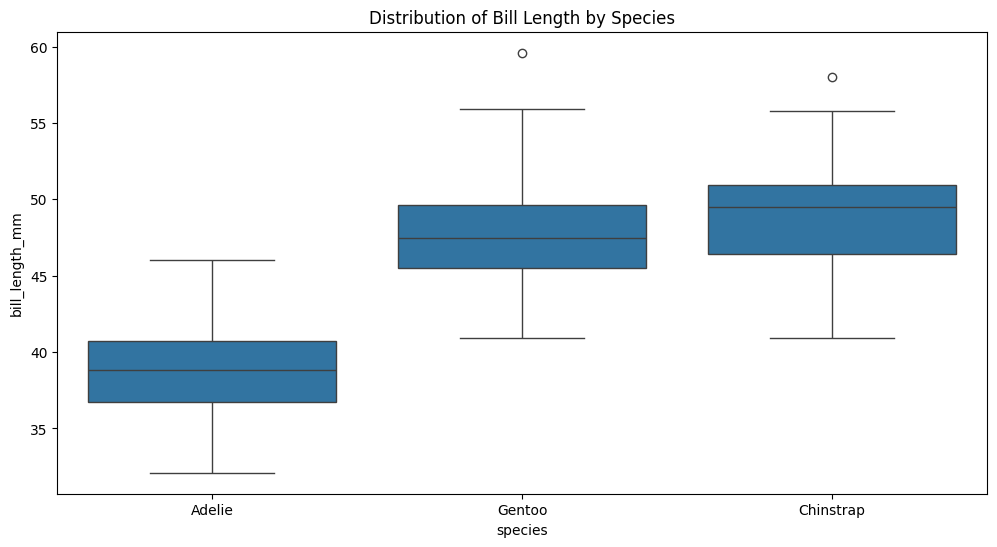

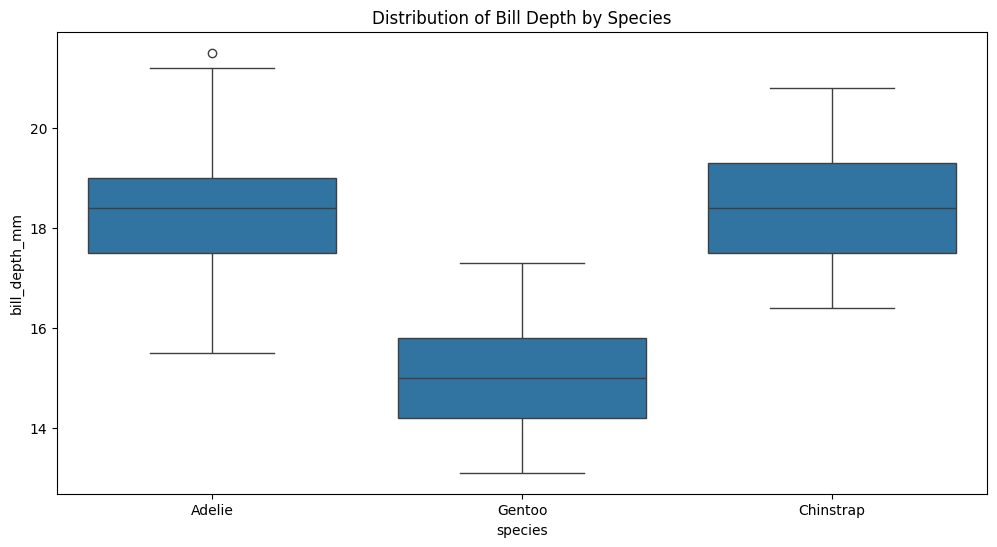

In [65]:

# Create a box plot to compare the distributions 
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='bill_length_mm', data=df_copy)
plt.title('Distribution of Bill Length by Species')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='bill_depth_mm', data=df_copy)
plt.title('Distribution of Bill Depth by Species')
plt.show()


In [66]:
species_groups = df.groupby('species')

skewness = {}
kurtosis = {}

# Loop through each species group and calculate skewness and kurtosis for each numerical column
for species, group in species_groups:
    skewness[species] = group[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].skew()
    kurtosis[species] = group[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].kurtosis()

# Convert the results to DataFrames for easier viewing
skewness_df = pd.DataFrame(skewness)
kurtosis_df = pd.DataFrame(kurtosis)

print("Skewness for each feature per species:")
print(skewness_df)

print("\nKurtosis for each feature per species:")
print(kurtosis_df)


Skewness for each feature per species:
                     Adelie  Chinstrap    Gentoo
bill_length_mm     0.161674  -0.120513  0.684577
bill_depth_mm      0.321239   0.006879  0.324231
flipper_length_mm  0.087337  -0.009472  0.394850
body_mass_g        8.807538   5.852497  5.155782

Kurtosis for each feature per species:
                      Adelie  Chinstrap     Gentoo
bill_length_mm     -0.157204   0.052999   1.335141
bill_depth_mm      -0.060308  -0.874796  -0.583455
flipper_length_mm   0.331959   0.046358  -0.575221
body_mass_g        96.115943  42.535098  43.516938


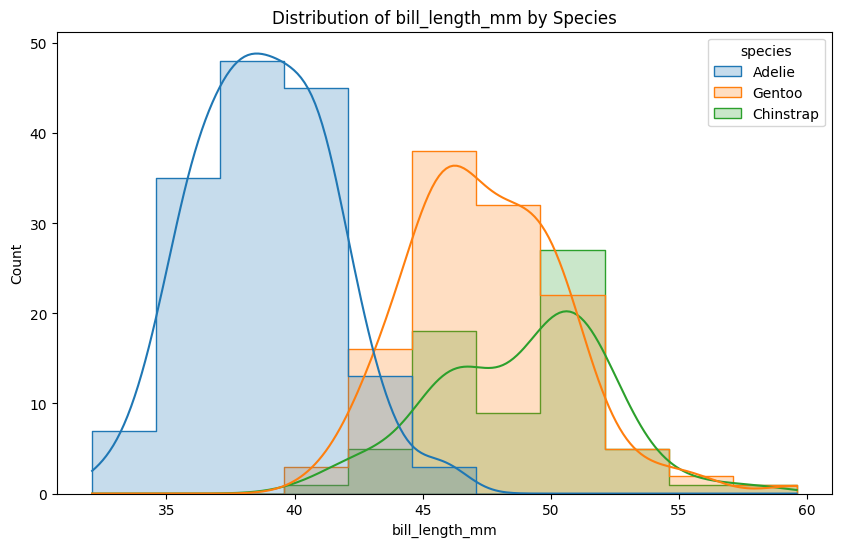

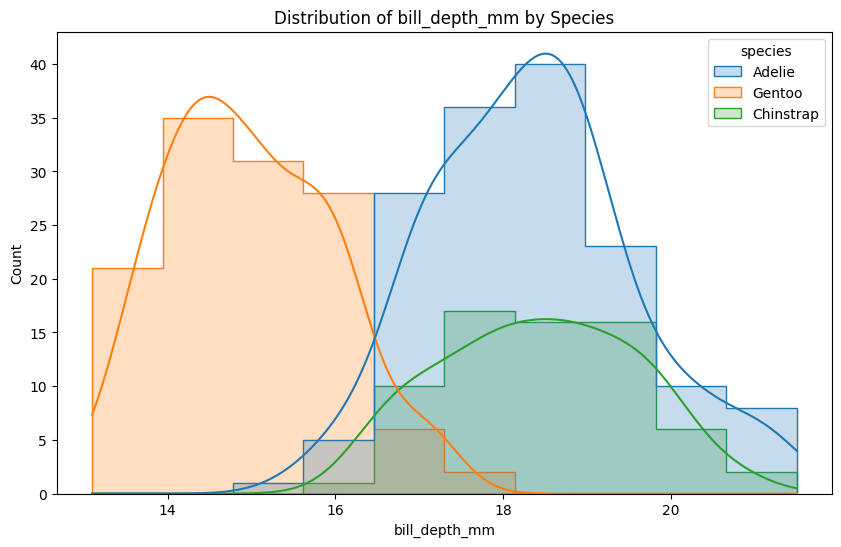

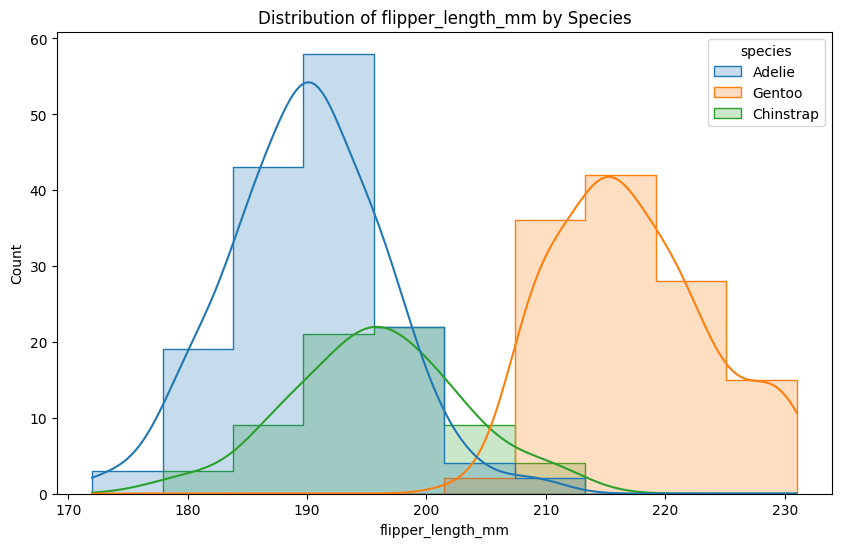

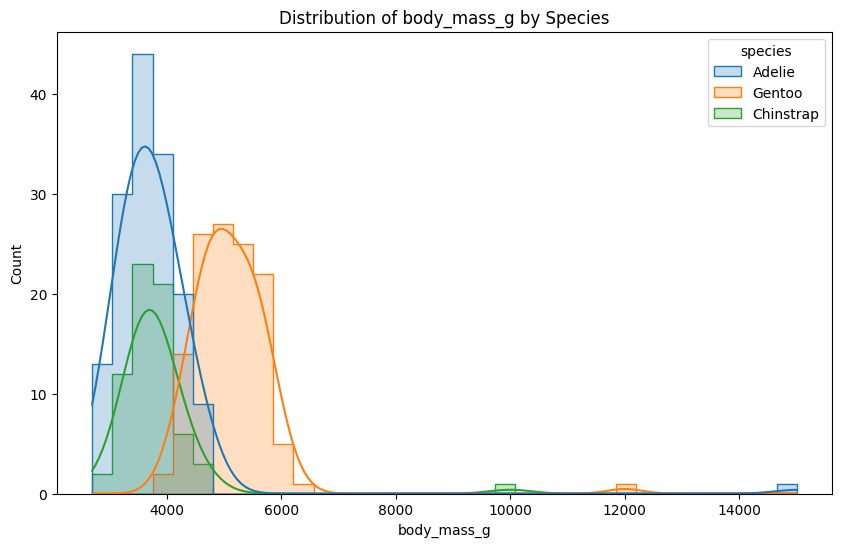

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='species', kde=True, element='step')
    plt.title(f"Distribution of {feature} by Species")
    plt.show()


# **Handling Outliers**

No outliers detected in bill_length_mm
No outliers detected in bill_depth_mm
No outliers detected in flipper_length_mm
Outliers detected in body_mass_g:
73     15000.0
206    12000.0
324    10000.0
Name: body_mass_g, dtype: float64


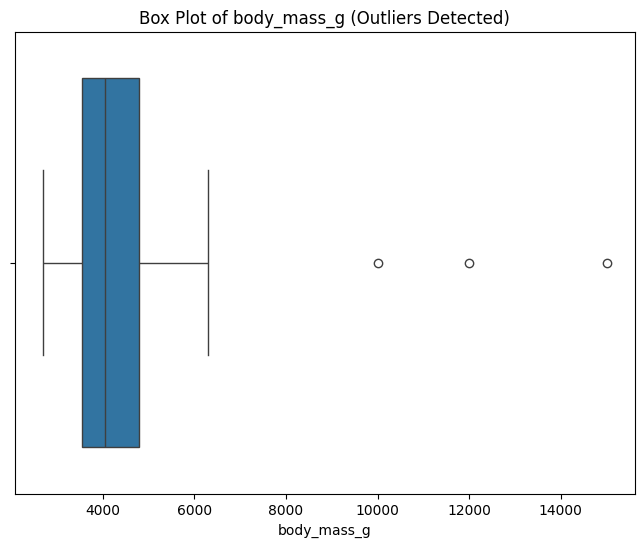

In [68]:

# Function to detect outliers using IQR
def detect_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers

# Loop through numerical features and detect outliers
for feature in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
  outliers = detect_outliers_iqr(df_copy[feature])

  if not outliers.empty:
    print(f"Outliers detected in {feature}:")
    print(outliers)

    # Visualize outliers using box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_copy[feature])
    plt.title(f"Box Plot of {feature} (Outliers Detected)")
    plt.show()
  else:
    print(f"No outliers detected in {feature}")


# **Does this dataset contribute to the curse of dimensionality? If yes perform PCA.**

In [94]:
print(len(df_copy))

328


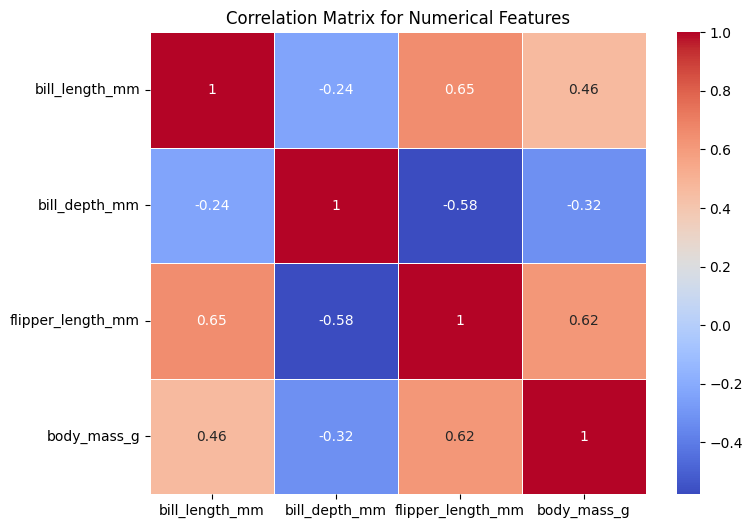

In [95]:

numeric_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Calculate the correlation matrix
correlation_matrix = df_copy[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


In [96]:
# Checking variance of numeric features
variances = df_copy[numeric_features].var()

print("Variance of each feature:")
print(variances)


Variance of each feature:
bill_length_mm       3.005381e+01
bill_depth_mm        3.859687e+00
flipper_length_mm    1.976076e+02
body_mass_g          1.283680e+06
dtype: float64


In [97]:

numeric_df = df_copy[numeric_features]


In [102]:
mean = numeric_df.mean(axis=0)
std = numeric_df.std(axis=0)
standardized_data = (numeric_df - mean) / std
print("Standardized Data:")

standardized_data.head(10)

Standardized Data:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.885996,0.777633,-1.412121,-0.464920
1,-0.813032,0.115923,-1.056434,-0.420790
2,-0.667104,0.421328,-0.416197,-0.906228
4,-1.323782,1.083037,-0.558472,-0.729705
5,-0.849514,1.744747,-0.771885,-0.553182
6,-0.922479,0.319526,-1.412121,-0.575247
7,-0.867755,1.235739,-0.416197,0.351499
12,-0.521175,0.217725,-1.340984,-0.950359
13,-0.977202,2.050151,-0.700747,-0.420790
14,-1.706844,1.999250,-0.202785,0.108780


In [104]:
cov_matrix = np.cov(standardized_data.T)
print(cov_matrix)


[[ 1.         -0.23737322  0.65310641  0.46034516]
 [-0.23737322  1.         -0.57680019 -0.32029062]
 [ 0.65310641 -0.57680019  1.          0.61714368]
 [ 0.46034516 -0.32029062  0.61714368  1.        ]]


In [105]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)



Eigenvalues:
[2.46408073 0.21461441 0.53565512 0.78564974]

Eigenvectors:
[[ 0.48538413 -0.41634327  0.57306837  0.512497  ]
 [-0.41843939  0.36511658 -0.11668879  0.82339667]
 [ 0.58893587  0.79888091  0.11601935 -0.03851429]
 [ 0.49240761 -0.23481368 -0.80281747  0.24058552]]



Projected Data (First 2 Principal Components):
          PC1       PC2
0   -1.816020  0.128763
1   -1.272512 -0.381774
2   -1.191449 -0.196965
3   -1.783945  0.059288
4   -1.869393  0.897886
..        ...       ...
323  0.626229  2.132839
324 -0.570963  0.156772
325 -0.266254  0.873228
326  0.523071  1.343138
327 -0.110148  1.125178

[328 rows x 2 columns]

Variance explained by each principal component:
PC1: 61.60%
PC2: 19.64%


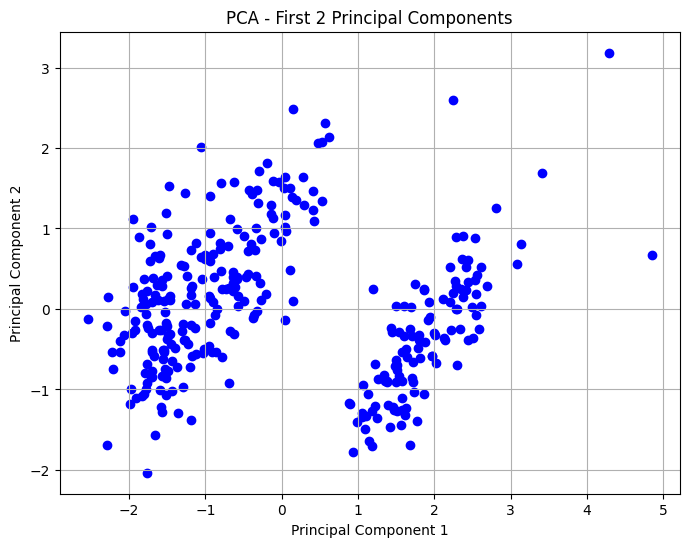

In [107]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


pca_data_2d = np.dot(standardized_data, sorted_eigenvectors[:, :2])

pca_df_2d = pd.DataFrame(pca_data_2d, columns=['PC1', 'PC2'])

print("\nProjected Data (First 2 Principal Components):")
print(pca_df_2d)

explained_variance_ratio = eigenvalues[sorted_indices] / np.sum(eigenvalues)

print("\nVariance explained by each principal component:")
for i in range(2):  # Only the first 2 principal components
    print(f"PC{i+1}: {explained_variance_ratio[i]*100:.2f}%")

# Visualization of the first 2 principal components
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_df_2d['PC1'], pca_df_2d['PC2'], color='blue')
plt.title('PCA - First 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Explained variance by each principal component:
Principal Component 1: 61.60%
Principal Component 2: 19.64%
Principal Component 3: 13.39%
Principal Component 4: 5.37%


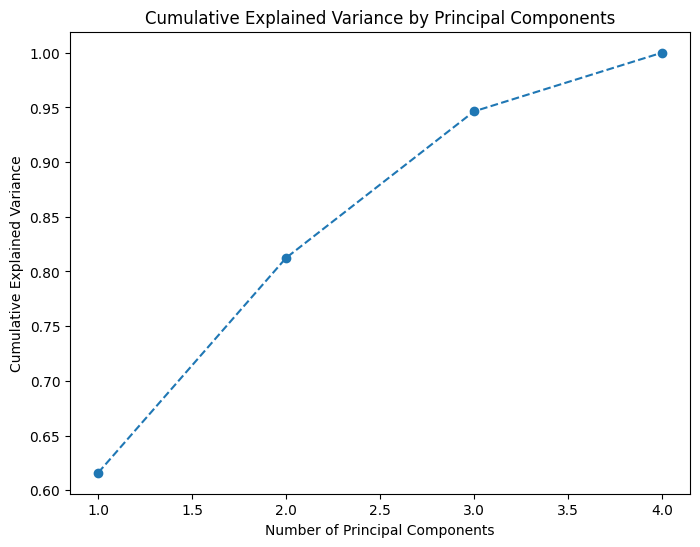

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_copy[numeric_features])

pca = PCA(n_components=len(numeric_features))  # Set the number of components to the number of features
pca.fit(scaled_data)

explained_variance = pca.explained_variance_ratio_

print("Explained variance by each principal component:")
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {var * 100:.2f}%")

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(numeric_features) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


# **Visualizing Relation bw bill_length_mm vs bill_depth_mm**

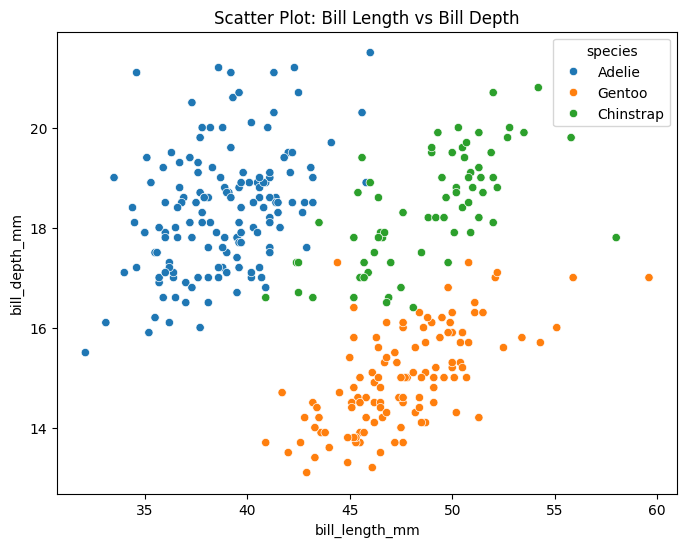

In [82]:
#  Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=df_copy, hue='species')
plt.title('Scatter Plot: Bill Length vs Bill Depth')
plt.show()


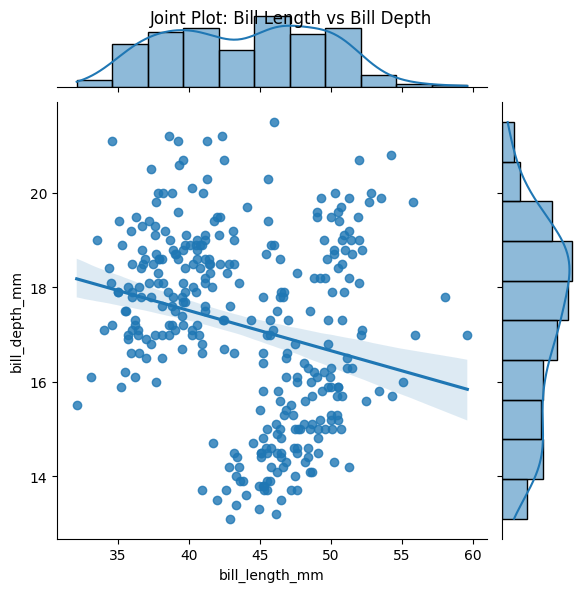

In [83]:

#  Joint Plot (with regression line)
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df_copy, kind='reg')
plt.suptitle('Joint Plot: Bill Length vs Bill Depth')
plt.show()


<Figure size 800x600 with 0 Axes>

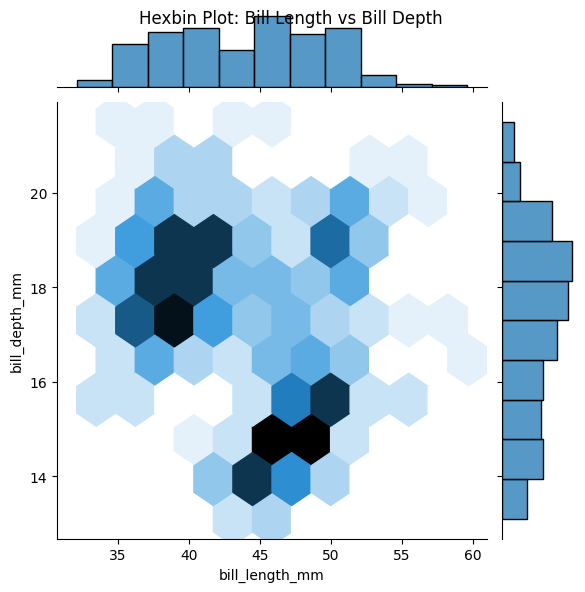

In [84]:

#  Hexbin Plot
plt.figure(figsize=(8, 6))
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df_copy, kind='hex')
plt.suptitle('Hexbin Plot: Bill Length vs Bill Depth')
plt.show()

<ipython-input-85-bc1641c41d49>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='bill_length_mm', y='bill_depth_mm', data=df_copy, cmap='viridis', shade=True)


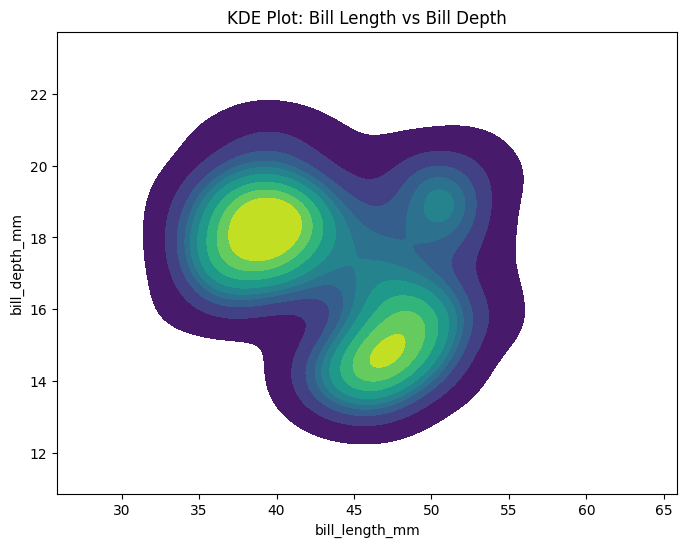

In [85]:

#  Kernel Density Estimation (KDE) Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(x='bill_length_mm', y='bill_depth_mm', data=df_copy, cmap='viridis', shade=True)
plt.title('KDE Plot: Bill Length vs Bill Depth')
plt.show()


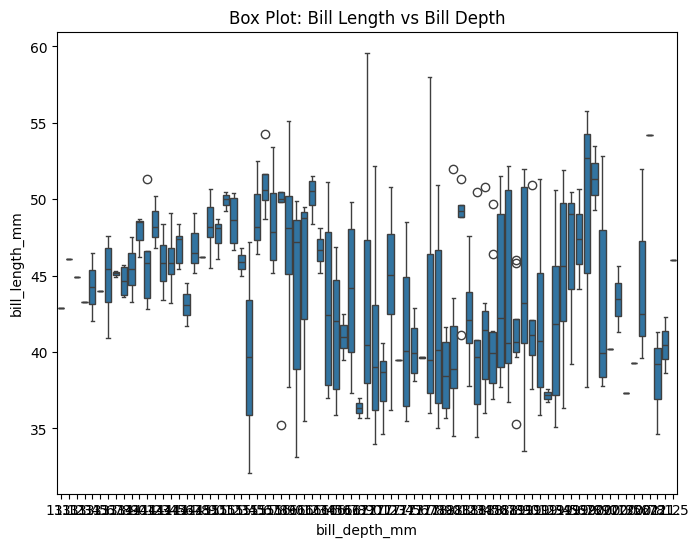

In [86]:

#  Box Plot (Bill Length by Bill Depth)
plt.figure(figsize=(8, 6))
sns.boxplot(x='bill_depth_mm', y='bill_length_mm', data=df_copy)
plt.title('Box Plot: Bill Length vs Bill Depth')
plt.show()


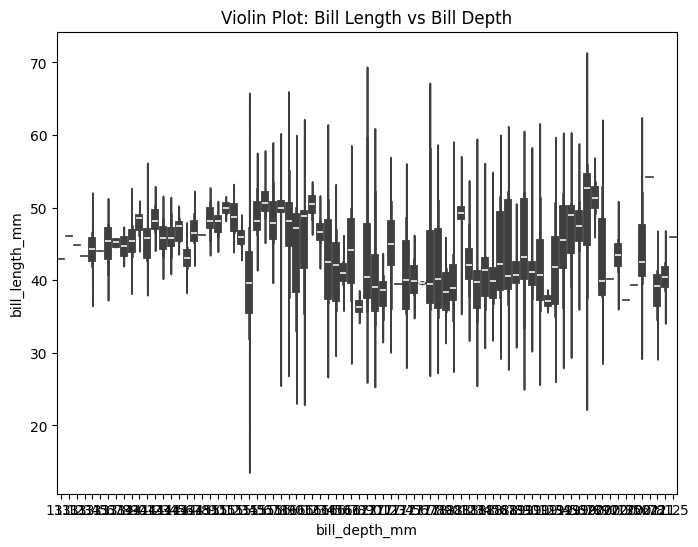

In [87]:

# Violin Plot (Bill Length by Bill Depth)
plt.figure(figsize=(8, 6))
sns.violinplot(x='bill_depth_mm', y='bill_length_mm', data=df_copy)
plt.title('Violin Plot: Bill Length vs Bill Depth')
plt.show()



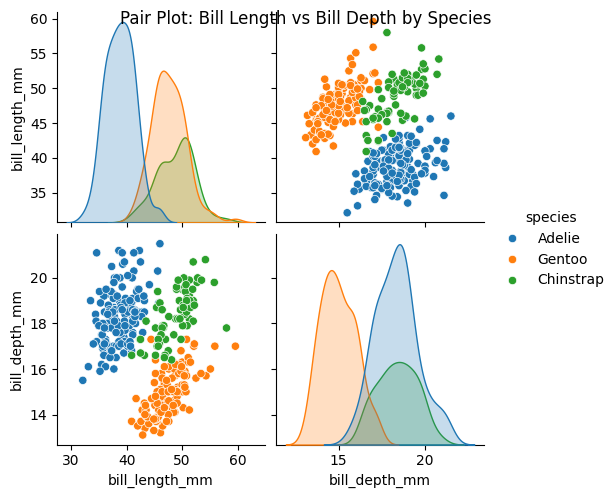

In [88]:

#  Pair Plot (Bill Length and Bill Depth by Species)
sns.pairplot(df_copy, vars=['bill_length_mm', 'bill_depth_mm'], hue='species')
plt.suptitle('Pair Plot: Bill Length vs Bill Depth by Species')
plt.show()



# **Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island?**

In [89]:
# prompt: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island?

# Group by species and island, then find the maximum flipper length
max_flipper_length = df_copy.groupby(['species', 'island'])['flipper_length_mm'].max()

# Print the results
print("Maximum flipper length for each species and island:\n", max_flipper_length)

# Find the species with the longest flippers on each island
longest_flippers_by_island = df_copy.loc[df_copy.groupby(['island'])['flipper_length_mm'].idxmax()]

print("\nSpecies with the longest flippers on each island:\n", longest_flippers_by_island[['island', 'species', 'flipper_length_mm']])


Maximum flipper length for each species and island:
 species    island   
Adelie     Biscoe       203.0
           Dream        208.0
           Torgersen    202.0
Chinstrap  Dream        212.0
Gentoo     Biscoe       231.0
Name: flipper_length_mm, dtype: float64

Species with the longest flippers on each island:
         island    species  flipper_length_mm
215     Biscoe     Gentoo              231.0
323      Dream  Chinstrap              212.0
123  Torgersen     Adelie              202.0


# **Perform z-score normalization on this dataset**

In [92]:

df_copy_deep = df_copy.copy(deep=True)


In [93]:

for column in df_copy_deep.select_dtypes(include=np.number).columns:
  mean = df_copy_deep[column].mean()
  std = df_copy_deep[column].std()
  df_copy_deep[column] = (df_copy_deep[column] - mean) / std

print(df_copy_deep)


       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen       -0.885996       0.777633          -1.412121   
1       Adelie  Torgersen       -0.813032       0.115923          -1.056434   
2       Adelie  Torgersen       -0.667104       0.421328          -0.416197   
4       Adelie  Torgersen       -1.323782       1.083037          -0.558472   
5       Adelie  Torgersen       -0.849514       1.744747          -0.771885   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream        2.160262       1.337541           0.437452   
340  Chinstrap      Dream       -0.083390       0.472228           0.081765   
341  Chinstrap      Dream        1.029315       0.523129          -0.558472   
342  Chinstrap      Dream        1.248208       0.930335           0.650864   
343  Chinstrap      Dream        1.138762       0.777633          -0.202785   

     body_mass_g      sex  
0      -0.464920     ma